In [1]:
import pandas as pd
import os
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
# Arbeitsverzeichnis ändern 
neues_verzeichnis = "c:\\Users\\lpres\\OneDrive - JGU\\WMDV\\WebMining"
#neues_verzeichnis = "C:\\Users\\Lucian\\Desktop\\WebMining"
os.chdir(neues_verzeichnis)

# Überprüfen, ob das Verzeichnis geändert wurde
print("Neues Arbeitsverzeichnis:", os.getcwd())

Neues Arbeitsverzeichnis: c:\Users\lpres\OneDrive - JGU\WMDV\WebMining


In [3]:
# Alle vorhandenen owned_games_x Dateien finden
owned_files = [f for f in os.listdir('.') if re.match(r'owned_games_\d+\.csv', f)]
owned_files.sort(key=lambda x: int(re.search(r'\d+', x).group()))

print(f"Vorhandene Dateien: {owned_files}")

if not owned_files:
    print("Keine Dateien im Format 'owned_games_x.csv' gefunden. Das Skript wird beendet.")

# Alle Dateien einlesen und in einem DataFrame speichern
pre_df = pd.DataFrame()  # Leerer DataFrame

for file in owned_files:
    file_df = pd.read_csv(file, dtype={
         "steam_64_id": str,
         "appid": "Int64",  
         "playtime_forever": "Int64",
         "playtime_2weeks": "Int64"
    })
    pre_df = pd.concat([pre_df, file_df], ignore_index=True)

print("alle Dateien eingelesen")

Vorhandene Dateien: ['owned_games_1.csv', 'owned_games_2.csv', 'owned_games_3.csv', 'owned_games_4.csv', 'owned_games_5.csv', 'owned_games_6.csv', 'owned_games_7.csv']


C:\Users\lpres\AppData\Local\Temp\ipykernel_12708\3620433079.py:14: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  file_df = pd.read_csv(file, dtype={


alle Dateien eingelesen


In [4]:
print(pre_df.shape)



(8474319, 6)


In [5]:
df = pre_df.drop_duplicates(keep="first")

dropped_rows = pre_df.shape[0] - df.shape[0]

print(df.shape)
print(f"{dropped_rows} Zeilen wurden entfernt")


(3951491, 6)
1926871 Zeilen wurden entfernt


In [6]:
# Größe des Datensatzes
dataset_size = df.shape

# Anzahl der Spieler
player_count = df['steam_64_id'].nunique()

# Anzahl der einzigartigen Spiele (basierend auf AppID)
unique_games_count = df['appid'].nunique()

# Spiele, die von den meisten Spielern gespielt werden
most_played_games = df['name'].value_counts().head(10)

# Spiele mit der meisten Spielzeit (gemessen an "playtime_forever")
most_played_time_games = df.groupby('name')['playtime_forever'].sum().sort_values(ascending=False).head(10)
# groupby --> ein Eintrag pro Spiel; playtime_forever summiert für alle Spieler

most_playing_player = df.groupby('steam_64_id')['playtime_forever'].sum().sort_values(ascending=False).head(10)


print('Größe des Datensatzes: ', dataset_size)
print('Anzahl der Spieler: ', player_count)
print('Anzahl der einzigartigen Spiele: ', unique_games_count)
print()
print('Spiele, die von den meisten Spielern gespielt werden: ', most_played_games)
print()
print('Spiele mit der meisten Spielzeit: ', most_played_time_games)
#print('Spieler mit der meisten Spielzeit: ', most_playing_player)


Größe des Datensatzes:  (3951491, 6)
Anzahl der Spieler:  61981
Anzahl der einzigartigen Spiele:  36758

Spiele, die von den meisten Spielern gespielt werden:  name
Dota 2                 32138
Counter-Strike 2       31174
No Games               28991
PUBG: BATTLEGROUNDS    23279
Wallpaper Engine       14682
Apex Legends           14252
Left 4 Dead 2          14165
Warframe               11217
Dota Underlords        11131
PAYDAY 2               11123
Name: count, dtype: int64

Spiele mit der meisten Spielzeit:  name
Dota 2                            6973821033
Counter-Strike 2                  1542475193
PUBG: BATTLEGROUNDS                406787775
Grand Theft Auto V                 209410057
Rust                               174913430
Apex Legends                       123973517
Tom Clancy's Rainbow Six Siege     112252378
Warframe                            87392802
Wallpaper Engine                    71645718
Team Fortress 2                     67343753
Name: playtime_forever, dtyp

Bereinigung des Datensatzes

In [7]:
# Filter out rows where the playtime_forever is zero (i.e., players who haven't played the game)
filtered_data = df[df['playtime_forever'] > 0]

# Group by game (using 'appid' and 'name'), and calculate the average playtime per game
average_playtime = (filtered_data.groupby(['appid', 'name'])['playtime_forever'].mean().reset_index())

# Sort the results by average playtime in descending order and take the top 10
top_10_games = average_playtime.sort_values(by='playtime_forever', ascending=False)
top_10_games['playtime_forever'] = top_10_games['playtime_forever'].round(1)
top_10_games.head(10)


,appid,name,playtime_forever
24253,1670890,Lamia's Plan,464227.5
22648,1419480,Love's Sweet Garnish 2,357526.0
14840,700440,Jellyfish,277663.0
21,570,Dota 2,216996.1
6649,381320,Bezier,202649.5
14067,663920,Died Of Fear,202560.0
11252,544680,Holy Avenger,140968.7
19495,1045620,Atelier Lulua ~The Scion of Arland~,128557.2
26331,2108560,Harem King: Peasant to Princess Gotta Breed 'E...,121946.3
14968,705710,Sense of The Devil,121721.0


In [8]:
filtered_data.shape

(2214065, 6)

In [9]:
filtered_player_count = filtered_data['steam_64_id'].nunique()
filtered_player_count

30893

In [10]:
player_count_20_percent = int(filtered_player_count*0.2)

player_count_20_percent

6178

In [11]:
unique_players_per_game = filtered_data.groupby('name')['steam_64_id'].nunique()
unique_players_per_game = unique_players_per_game.sort_values(ascending=False)
unique_players_per_game.head(10)

name
Dota 2                   27870
Counter-Strike 2         25783
PUBG: BATTLEGROUNDS      19408
Wallpaper Engine         12767
Left 4 Dead 2            11603
Apex Legends             10727
Dota Underlords           8876
Don't Starve Together     8835
Grand Theft Auto V        8616
Team Fortress 2           8520
Name: steam_64_id, dtype: int64

In [12]:
most_played_by_time = filtered_data.groupby('name')['playtime_forever'].sum().sort_values(ascending=False)
most_played_by_time.head(10)

name
Dota 2                            6973821033
Counter-Strike 2                  1542475193
PUBG: BATTLEGROUNDS                406787775
Grand Theft Auto V                 209410057
Rust                               174913430
Apex Legends                       123973517
Tom Clancy's Rainbow Six Siege     112252378
Warframe                            87392802
Wallpaper Engine                    71645718
Team Fortress 2                     67343753
Name: playtime_forever, dtype: Int64

C:\Users\Lucian\AppData\Local\Temp\ipykernel_17208\908489526.py:11: UserWarning: Glyph 38592 (\N{CJK UNIFIED IDEOGRAPH-96C0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lucian\AppData\Local\Temp\ipykernel_17208\908489526.py:11: UserWarning: Glyph 39746 (\N{CJK UNIFIED IDEOGRAPH-9B42}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lucian\AppData\Local\Temp\ipykernel_17208\908489526.py:11: UserWarning: Glyph 40635 (\N{CJK UNIFIED IDEOGRAPH-9EBB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lucian\AppData\Local\Temp\ipykernel_17208\908489526.py:11: UserWarning: Glyph 23558 (\N{CJK UNIFIED IDEOGRAPH-5C06}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lucian\AppData\Local\Temp\ipykernel_17208\908489526.py:11: UserWarning: Glyph 39740 (\N{CJK UNIFIED IDEOGRAPH-9B3C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lucian\AppData\Local\Temp\ipykernel_17208\908489526.py:11: UserWarning: Glyph 35895 (\

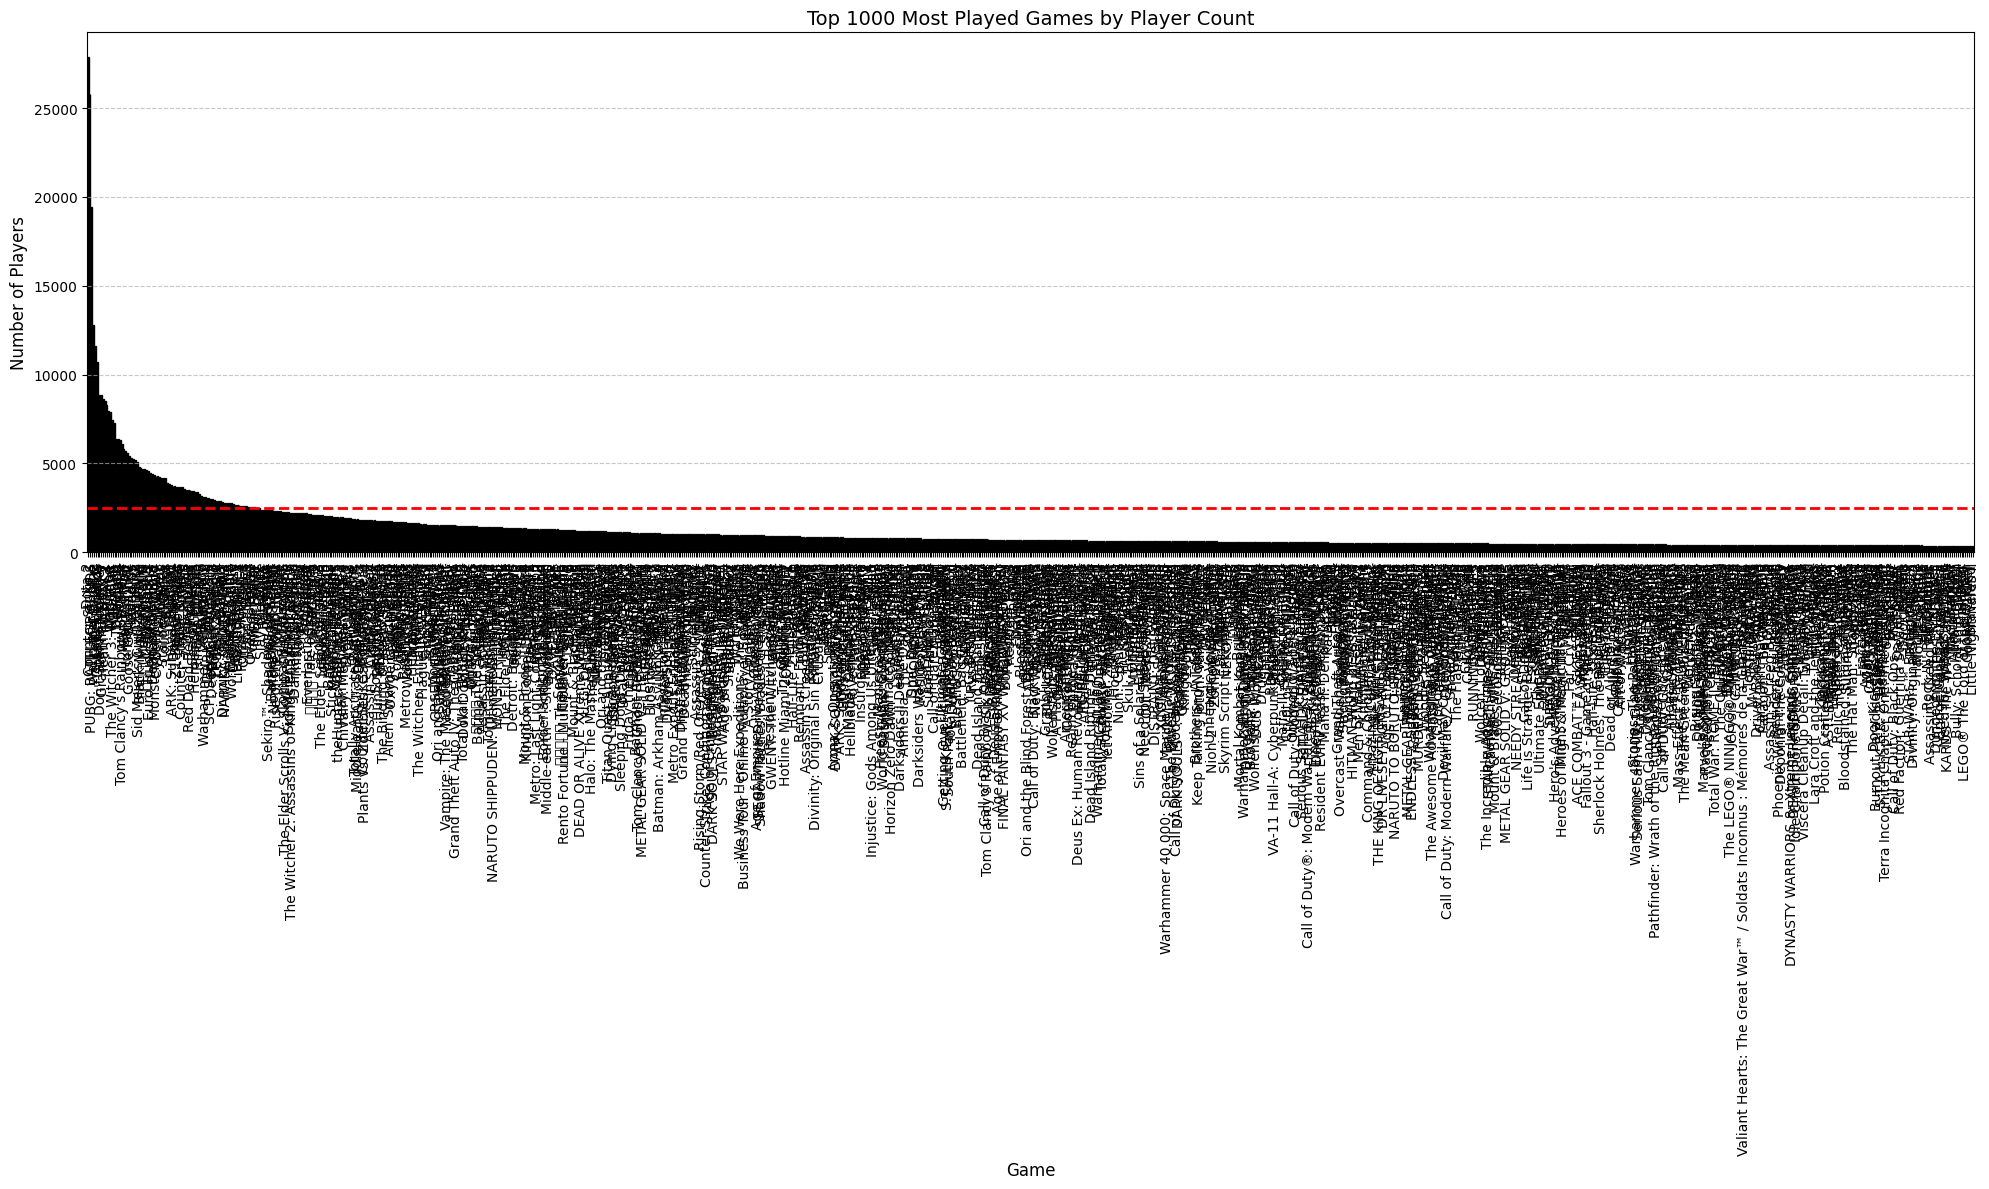

In [13]:
# Plot the top 1000 most played games

plt.figure(figsize=(20, 12))
top_1000_games = unique_players_per_game.head(1000).sort_values(ascending=False)
top_1000_games.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 1000 Most Played Games by Player Count', fontsize=14)
plt.ylabel('Number of Players', fontsize=12)
plt.xlabel('Game', fontsize=12)
plt.axhline(y=2500, color='red', linestyle='--', linewidth=2)  # Add horizontal red line at 2500
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [32]:
unique_players_per_game.head(1000).sort_values(ascending=False).tail(10)

name
Machinarium                                      373
Hatred                                           372
Mafia                                            372
The Deer                                         372
LEGO® The Lord of the Rings™                     372
Bully: Scholarship Edition                       372
Monster Train                                    371
Little Nightmares II                             369
Call of Duty®: Modern Warfare® II - Open Beta    369
Thronebreaker: The Witcher Tales                 369
Name: steam_64_id, dtype: int64

In [14]:
games_2500_players = unique_players_per_game[unique_players_per_game >= 2500]
games_2500_players.tail(10)

name
Fallout 4           2607
Forza Horizon 4     2599
Cities: Skylines    2578
Hades               2576
Don't Starve        2566
Portal              2548
Overcooked! 2       2546
Pummel Party        2531
For Honor           2526
tModLoader          2509
Name: steam_64_id, dtype: int64

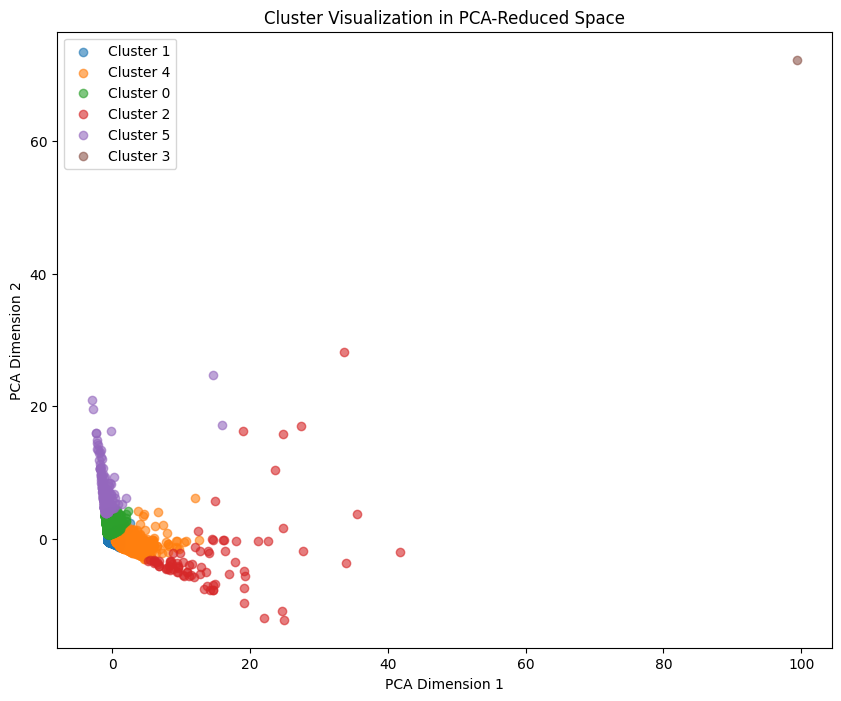

,total_playtime,total_games,active_games,avg_playtime_per_game
cluster,,,,
0,614860.480909,4.816364,1.293182,141467.496379
1,341882.236657,46.536407,1.794215,15413.71182
2,8606173.207317,3316.804878,44.463415,13702.488881
3,346685814.0,1107.0,193.0,313175.98374
4,849575.278877,241.411295,10.897256,7689.164021


In [21]:
# Step 2: Aggregate Data for Players
# Calculate total playtime, total games owned, and active games per player

player_summary = filtered_data.groupby('steam_64_id').agg(
    total_playtime=('playtime_forever', 'sum'),
    total_games=('appid', 'count'),
    active_games=('playtime_2weeks', lambda x: (x > 0).sum())
).reset_index()

# Step 3: Feature Engineering
# Calculate average playtime per game
player_summary['avg_playtime_per_game'] = player_summary['total_playtime'] / player_summary['total_games']

# Fill NaN values (e.g., for players with zero games owned)
player_summary = player_summary.fillna(0)

# Step 4: Normalize Features for Clustering
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
features = ['total_playtime', 'total_games', 'active_games', 'avg_playtime_per_game']
scaler = StandardScaler()
normalized_features = scaler.fit_transform(player_summary[features])

# Apply KMeans clustering

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score



n_clusters = 6  # Example: Start with 4 clusters

kmeans = KMeans(n_clusters=n_clusters, random_state=42)

player_summary['cluster'] = kmeans.fit_predict(normalized_features)



# Calculate cluster profiles

cluster_profiles = player_summary.groupby('cluster')[features].mean()



# Visualize cluster distribution

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt



pca = PCA(n_components=2)

reduced_features = pca.fit_transform(normalized_features)

player_summary['pca1'] = reduced_features[:, 0]

player_summary['pca2'] = reduced_features[:, 1]



plt.figure(figsize=(10, 8))

for cluster in player_summary['cluster'].unique():

    cluster_data = player_summary[player_summary['cluster'] == cluster]

    plt.scatter(cluster_data['pca1'], cluster_data['pca2'], label=f"Cluster {cluster}", alpha=0.6)



plt.title("Cluster Visualization in PCA-Reduced Space")

plt.xlabel("PCA Dimension 1")

plt.ylabel("PCA Dimension 2")

plt.legend()

plt.show()

cluster_profiles.head()


In [17]:
# df mit Spielen, die von mindestens 2500 Spielern gespielt wurden

cluster_df = filtered_data[filtered_data['name'].isin(games_2500_players.index)]    

print(cluster_df.shape)
print(cluster_df.head(10))

(480443, 6)
          steam_64_id    appid                 name  playtime_forever  \
13  76561198213997533   236390          War Thunder                 1   
25  76561198213997533      730     Counter-Strike 2             48418   
33  76561198213997533   578080  PUBG: BATTLEGROUNDS              6840   
35  76561198213997533   714010              Aimlabs                32   
36  76561198213997533  1172470         Apex Legends               114   
39  76561198213997533  1782210            Crab Game                45   
42  76561198213997533      570               Dota 2            115688   
43  76561199420545335       10       Counter-Strike                36   
46  76561199420545335     4000          Garry's Mod              2983   
47  76561199420545335      620             Portal 2               366   

    playtime_2weeks has_community_visible_stats  
13                0                        True  
25                0                        True  
33                0               

In [18]:
cluster_df = cluster_df[cluster_df['playtime_forever'] > 119]
cluster_df.shape

(376243, 6)

In [19]:
#Anzahl der Spiele in cluster_df
print(cluster_df['name'].nunique())

#Anzahl der Spieler in cluster_df
print(cluster_df['steam_64_id'].nunique())

91
30800


In [20]:
# Prüfe für jedes Spiel in cluster_df, wie die spielzeit verteilt ist

# Group by game (using 'appid' and 'name'), and calculate the average playtime per game
average_playtime = (cluster_df.groupby(['appid', 'name'])['playtime_forever'].mean().reset_index())
playtime_25th_percentile = (cluster_df.groupby(['appid', 'name'])['playtime_forever'].quantile(0.25).reset_index())
playtime_25th_percentile['playtime_forever'] = playtime_25th_percentile['playtime_forever'].round()
playtime_75th_percentile = (cluster_df.groupby(['appid', 'name'])['playtime_forever'].quantile(0.75).reset_index())
playtime_75th_percentile['playtime_forever'] = playtime_75th_percentile['playtime_forever'].round()

# Verteilung der Spielzeit

# Sort the results by average playtime in descending order and take the top 10
top_10_games = average_playtime.sort_values(by='playtime_forever', ascending=False)

top_10_games['playtime_forever'] = top_10_games['playtime_forever'].round()
top_10_games['playtime_25'] = playtime_25th_percentile['playtime_forever']
top_10_games['playtime_75'] = playtime_75th_percentile['playtime_forever']

print("top_10_games average playtime")
print(top_10_games.head(10))
# print()
# print("playtime_25th_percentile")
# print(playtime_25th_percentile.sort_values(by='playtime_forever', ascending=False).head(10))
# print()
# print("playtime_75th_percentile")
# print(playtime_75th_percentile.sort_values(by='playtime_forever', ascending=False).head(10))


top_10_games average playtime
     appid                            name  playtime_forever  playtime_25  \
6      570                          Dota 2          224482.0      61277.0   
8      730                Counter-Strike 2           59803.0       4928.0   
26  252490                            Rust           33485.0        918.0   
0       10                  Counter-Strike           25807.0        302.0   
28  271590              Grand Theft Auto V           23933.0       2168.0   
53  578080             PUBG: BATTLEGROUNDS           23310.0       1202.0   
37  359550  Tom Clancy's Rainbow Six Siege           18977.0        904.0   
22  238960                   Path of Exile           18082.0        407.0   
36  346110           ARK: Survival Evolved           17771.0        446.0   
2      240          Counter-Strike: Source           17483.0        323.0   

    playtime_75  
6      326071.0  
8       83190.0  
26      24792.0  
0        7001.0  
28      17676.0  
53      27336.

<Figure size 2000x1200 with 0 Axes>

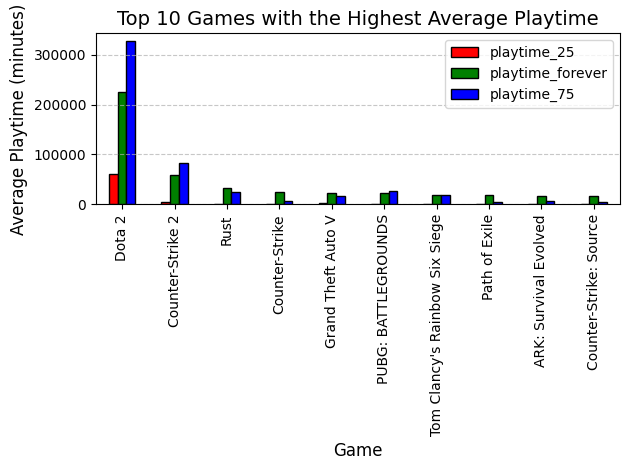

In [21]:
# Plot the top 10 games with the highest average playtime and the 25th and 75th percentiles
# dont plot appid

plt.figure(figsize=(20, 12))
top_10_games = top_10_games.head(10)
top_10_games.set_index('name', inplace=True)
top_10_games[[ 'playtime_25', 'playtime_forever', 'playtime_75']].plot(kind='bar', color=['red', 'green', 'blue'], edgecolor='black')               
plt.title('Top 10 Games with the Highest Average Playtime', fontsize=14)
plt.ylabel('Average Playtime (minutes)', fontsize=12)
plt.xlabel('Game', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [22]:
# Pivot-Tabelle: Spieler als Zeilen, Spiele als Spalten
# Cluster: Spieler mit ähnlichem Spielverhalten gruppieren
playtime_matrix = cluster_df.pivot_table(
    index='steam_64_id',  # Spieler
    columns='name',       # Spiele
    values='playtime_forever',  # Spielzeit
    fill_value=0          # Fehlende Werte mit 0 auffüllen
)

print(playtime_matrix.shape)
print(playtime_matrix.head())


(30800, 91)
name               7 Days to Die  ARK: Survival Evolved  Aimlabs  Among Us  \
steam_64_id                                                                  
76561197960359575            0.0                    0.0      0.0     143.0   
76561197960481035            0.0                    0.0      0.0       0.0   
76561197960497152         1217.0                    0.0      0.0       0.0   
76561197960497159         1217.0                    0.0      0.0       0.0   
76561197960510804            0.0                    0.0      0.0       0.0   

name               Apex Legends  Baldur's Gate 3  Banana  Battlefield™ V  \
steam_64_id                                                                
76561197960359575           0.0              0.0     0.0             0.0   
76561197960481035           0.0          16447.0     0.0             0.0   
76561197960497152        3158.0              0.0     0.0             0.0   
76561197960497159        3158.0              0.0     0.0     

In [23]:
playtime_matrix.head()

name,7 Days to Die,ARK: Survival Evolved,Aimlabs,Among Us,Apex Legends,Baldur's Gate 3,Banana,Battlefield™ V,Black Myth: Wukong,Borderlands 2,...,Valheim,Wallpaper Engine,War Thunder,Warface: Clutch,Warframe,Warhammer: Vermintide 2,World of Tanks Blitz,Z1 Battle Royale,tModLoader,雀魂麻将(MahjongSoul)
steam_64_id,,,,,,,,,,,,,,,,,,,,,
76561197960359575,0.0,0.0,0.0,143.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,747.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76561197960481035,0.0,0.0,0.0,0.0,0.0,16447.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,904.0,0.0,0.0,0.0,0.0,0.0
76561197960497152,1217.0,0.0,0.0,0.0,3158.0,0.0,0.0,0.0,0.0,0.0,...,0.0,384.0,3807.0,0.0,2616.0,860.0,1993.0,0.0,0.0,0.0
76561197960497159,1217.0,0.0,0.0,0.0,3158.0,0.0,0.0,0.0,0.0,0.0,...,0.0,384.0,3807.0,0.0,2616.0,860.0,1993.0,0.0,0.0,0.0
76561197960510804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
playtime_matrix.tail()

name,Armies of Riddle CLASSIC,Chamber of the Sci-Mutant Priestess,Elf World Adventure: Part 1,Sakura no Mori † Dreamers 2,Wanba Warriors,War of the Three Kingdoms,Симулятор Прыгания по Гаражам,神明的一天世界-God's One Day World,! That Bastard Is Trying To Steal Our Gold !,!Anyway!,...,龙魂时刻,신기록 : A Compendium of Ghosts,타워 오브 판타지,４人打ちアクション麻雀 / ACTION MAHJONG,～Daydream～When butterflies dance,🐰RabbiruN🐰,👑 Idle Calibur 👑（选王之剑）,👑Idle Calibur：Zero👑,🔴 Circles,🧠 OUT OF THE BOX
steam_64_id,,,,,,,,,,,,,,,,,,,,,
76561199803373970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76561199804547024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76561199807291056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76561199807600301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76561199809273418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Speichern der Pivot-Tabelle als CSV, damit sie nicht jedes mal neu erstellt werden muss
playtime_matrix.to_csv('playtime_matrix.csv')

In [ ]:
# Laden der Pivot-Tabelle aus der CSV-Datei
loaded_playtime_matrix = pd.read_csv('playtime_matrix.csv', index_col=0)

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

for i in range(3, 10):

    # Anzahl der Cluster definieren
    n_clusters = i
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Clustering 
    cluster_labels = kmeans.fit_predict(playtime_matrix)

    # Cluster-Statistiken anzeigen
    print(f"Anzahl der Cluster: {n_clusters}")
    print(pd.Series(cluster_labels).value_counts())
    print

    # Silhouette-Score berechnen
    silhouette_avg = silhouette_score(playtime_matrix, cluster_labels)
    print(f"Durchschnittlicher Silhouette-Score: {silhouette_avg}")

    # Davies-Bouldin-Index berechnen
    db_score = davies_bouldin_score(playtime_matrix, cluster_labels)
    print(f"Davies-Bouldin-Index: {db_score}")
    print()


Anzahl der Cluster: 3
0    18717
1     9756
2     2327
Name: count, dtype: int64
Durchschnittlicher Silhouette-Score: 0.4572495689235148
Davies-Bouldin-Index: 0.7934160124933696

Anzahl der Cluster: 4
0    16779
3     9577
1     3971
2      473
Name: count, dtype: int64
Durchschnittlicher Silhouette-Score: 0.4134814665981654
Davies-Bouldin-Index: 0.8940652296717195

Anzahl der Cluster: 5
0    14707
3     9151
1     3911
4     2529
2      502
Name: count, dtype: int64
Durchschnittlicher Silhouette-Score: 0.4037267162377653
Davies-Bouldin-Index: 0.9882305304434397

Anzahl der Cluster: 6
0    14373
3     8935
1     4269
4     2515
5      702
2        6
Name: count, dtype: int64
Durchschnittlicher Silhouette-Score: 0.39862171028004995
Davies-Bouldin-Index: 1.0094229096403171

Anzahl der Cluster: 7
0    12868
3     8319
1     5266
4     2296
5     1895
2      153
6        3
Name: count, dtype: int64
Durchschnittlicher Silhouette-Score: 0.37394351043793767
Davies-Bouldin-Index: 0.90015838675

Bisher sind 3 Cluster scheinbar am sinnvollsten. Silhouette Score sollte möglichst bei 1 sein.
Davies Bouldin-Index sollte möglichst niedrig sein.

In [8]:
# Anzahl der Cluster definieren
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Clustering 
cluster_labels = kmeans.fit_predict(playtime_matrix)

# Cluster-Statistiken anzeigen
print(f"Anzahl der Cluster: {n_clusters}")
print(pd.Series(cluster_labels).value_counts())
print

# Silhouette-Score berechnen
silhouette_avg = silhouette_score(playtime_matrix, cluster_labels)
print(f"Durchschnittlicher Silhouette-Score: {silhouette_avg}")

# Davies-Bouldin-Index berechnen
db_score = davies_bouldin_score(playtime_matrix, cluster_labels)
print(f"Davies-Bouldin-Index: {db_score}")
print()

Anzahl der Cluster: 3
0    5813
1    3706
2     952
Name: count, dtype: int64
Durchschnittlicher Silhouette-Score: 0.4241730933773278
Davies-Bouldin-Index: 0.8469731650815149



In [9]:
# Durchschnittliche Spielzeit für jedes Spiel in jedem Cluster
cluster_analysis = playtime_matrix.groupby('cluster').mean()
print(cluster_analysis)


KeyError: 'cluster'

In [13]:
from sklearn.cluster import KMeans

# Anzahl der Cluster definieren
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
player_data['cluster'] = kmeans.fit_predict(player_features)

# Ergebnisse anzeigen
print(player_data.head())


         steam_64_id  total_playtime  total_games  cluster
0  76561197961265268          390433          143        1
1  76561197961779384               0          110        1
2  76561197961814597          491455          116        3
3  76561197962529195          117600           60        1
4  76561197963489376          604393           76        3


In [14]:
# Cluster-Statistiken
cluster_stats = player_data.groupby('cluster').mean()
print(cluster_stats)


          steam_64_id  total_playtime  total_games
cluster                                           
0        7.656120e+16    7.635892e+05  1085.733333
1        7.656120e+16    2.067297e+05    39.800143
2        7.656120e+16    1.480915e+06  6765.000000
3        7.656120e+16    6.513479e+05    96.700553
